
#✅ **Core Final XGBOOST**

#✅ **Contexto y Descripción del Dataset**

Descripción del Dataset: El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

#✅ **MACHINE LEARNING**

In [1]:
#Importar dataset para entrenar a modelos
import pandas as pd
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core_xgboost/heart_disease_uci_clean.csv'
df=pd.read_csv(path)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

**2.- Split: features y target**

***Se estima conveniente incluir a todas las features en el X, para una primera versión de ML, en el caso de obtener métricas de predicción bajas o erróneas, se estimará la eliminación de algunas de ellas.***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        747 non-null    int64  
 1   age       747 non-null    int64  
 2   sex       747 non-null    object 
 3   dataset   747 non-null    object 
 4   cp        747 non-null    object 
 5   trestbps  747 non-null    float64
 6   chol      747 non-null    float64
 7   fbs       747 non-null    object 
 8   restecg   747 non-null    object 
 9   thalch    747 non-null    float64
 10  exang     747 non-null    object 
 11  oldpeak   747 non-null    float64
 12  slope     747 non-null    object 
 13  ca        747 non-null    float64
 14  thal      747 non-null    object 
 15  num       747 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 93.5+ KB


In [5]:
X=df.drop(columns=['num','id'])
y=df['num']

In [6]:
y.value_counts()

,count
num,
0,391
1,203
3,69
2,63
4,21


In [7]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        747 non-null    int64  
 1   age       747 non-null    int64  
 2   sex       747 non-null    object 
 3   dataset   747 non-null    object 
 4   cp        747 non-null    object 
 5   trestbps  747 non-null    float64
 6   chol      747 non-null    float64
 7   fbs       747 non-null    object 
 8   restecg   747 non-null    object 
 9   thalch    747 non-null    float64
 10  exang     747 non-null    object 
 11  oldpeak   747 non-null    float64
 12  slope     747 non-null    object 
 13  ca        747 non-null    float64
 14  thal      747 non-null    object 
 15  num       747 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 93.5+ KB


In [9]:
# Definir Variables
num_cols = ['age','trestbps','chol','thalch','oldpeak','ca']
nom_cols = ['sex', 'dataset','cp','fbs','restecg','exang','slope','thal']

### XGBoost de Clasificación

In [14]:
!pip install optuna

In [15]:
from xgboost import XGBClassifier


In [24]:

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Exactitud: 0.956140350877193
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Matriz de Confusión:
[[40  3]
 [ 2 69]]


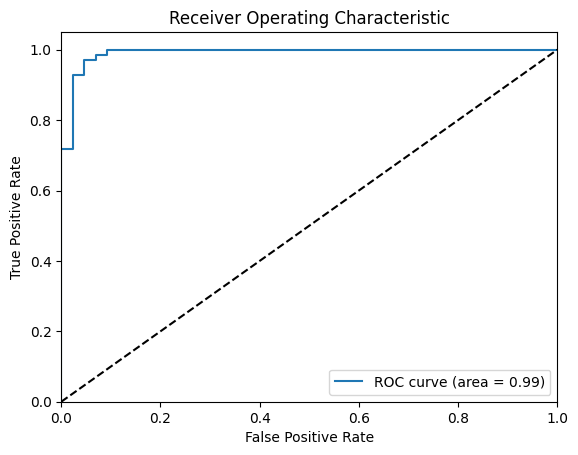

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred1 = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred1)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred1))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Matriz de Confusión:')
print(conf_matrix)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy XGBoost: 0.9561
Precision XGBoost : 0.9583
Recall XGBoost : 0.9718
F1-Score XGBoost: 0.9650


# Optimización

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:48:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Exactitud del mejor modelo: 0.9736842105263158
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Matriz de Confusión:
[[41  2]
 [ 1 70]]


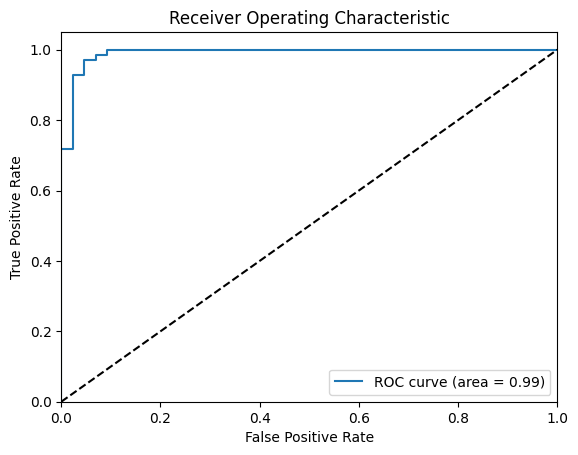

In [32]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred2)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred2))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Matriz de Confusión:')
print(conf_matrix)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Evaluación del modelo entrenado y optimizado para predecir el target 'num'
* Variable objetivo:Diagnóstico [0,1,2,3,4]
* De acuerdo a métricas accuracy , precision, recall y f1

In [33]:
# Evaluar XGBoost
print(f"Accuracy XGBoost: {accuracy_score(y_test, y_pred1):.4f}")
print(f"Precision XGBoost : {precision_score(y_test, y_pred1):.4f}")
print(f"Recall XGBoost : {recall_score(y_test, y_pred1):.4f}")
print(f"F1-Score XGBoost: {f1_score(y_test, y_pred1):.4f}")

Accuracy XGBoost: 0.9561
Precision XGBoost : 0.9583
Recall XGBoost : 0.9718
F1-Score XGBoost: 0.9650


In [34]:
# Evaluar XGBoost post optimización
print(f"Accuracy XGBoost Optimizado: {accuracy_score(y_test, y_pred2):.4f}")
print(f"Precision XGBoost Optimizado : {precision_score(y_test, y_pred2):.4f}")
print(f"Recall XGBoost Optimizado : {recall_score(y_test, y_pred2):.4f}")
print(f"F1-Score XGBoost Optimizado: {f1_score(y_test, y_pred2):.4f}")

Accuracy XGBoost Optimizado: 0.9737
Precision XGBoost Optimizado : 0.9722
Recall XGBoost Optimizado : 0.9859
F1-Score XGBoost Optimizado: 0.9790


# Comparación de Modelos: XGBoost vs XGBoost (Optimizado)

# 📊 Comparación de Modelos XGBoost: Base vs Optimizado con GridSearchCV

## 🔢 Resultados Obtenidos

| Métrica       | XGBoost Base    | XGBoost Optimizado |
|---------------|-----------------|--------------------|
| **Accuracy**  | 0.9561          | **0.9737**         |
| **Precision** | 0.9583          | **0.9722**         |
| **Recall**    | 0.9718          | **0.9859**         |
| **F1-score**  | 0.9650          | **0.9790**         |

---

## 🧠 Análisis Comparativo

### ✅ 1. Accuracy
El modelo optimizado mejora la precisión general del modelo, pasando de **95.61% a 97.37%**, lo que representa una mejora significativa en la tasa de predicciones correctas.

### 🧠 2. Precision
Se incrementa de **0.9583 a 0.9722**, indicando una menor cantidad de **falsos positivos**. El modelo se vuelve más confiable al etiquetar instancias positivas.

### 🔍 3. Recall
Mejora de **0.9718 a 0.9859**, lo cual refleja que el modelo optimizado es capaz de detectar una mayor proporción de **verdaderos positivos**, disminuyendo los falsos negativos.

### ⚖️ 4. F1-score
El F1-score aumenta de **0.9650 a 0.9790**, evidenciando un mejor **equilibrio entre precisión y recall**, clave en contextos donde ambas métricas son relevantes.

---

## 🧾 Conclusión

El modelo **XGBoost optimizado con GridSearchCV** supera ampliamente al modelo base en todas las métricas clave:

- Aumenta la **precisión global** del modelo.
- Reduce tanto **falsos positivos** como **falsos negativos**.
- Logra un mejor **balance general** gracias a un F1-score más alto.

Estos resultados demuestran que la optimización de hiperparámetros es una etapa crítica para explotar al máximo el rendimiento de modelos como XGBoost.

---

## 💡 Recomendaciones

- Utilizar los hiperparámetros óptimos identificados para entrenamientos finales o implementación en producción.
- Complementar el análisis con métricas visuales como la **matriz de confusión**, **curva ROC/AUC**, y **curvas de aprendizaje**.
- Considerar técnicas de optimización más eficientes como **RandomizedSearchCV** o **Optuna** si se requiere más exploración en menos tiempo.



In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


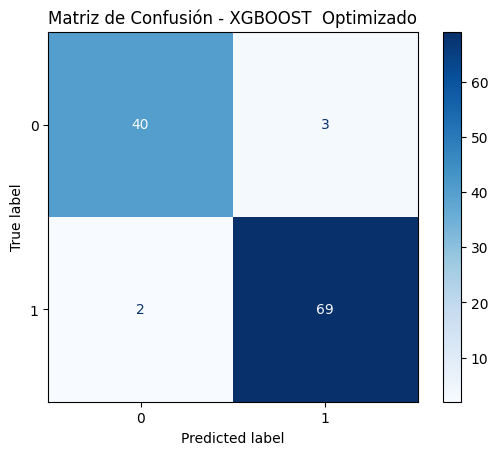

In [37]:
# Predicciones
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, cmap="Blues", normalize=None)

plt.title("Matriz de Confusión - XGBOOST  Optimizado")
plt.show()

# SE OBSERVA

1. En la clasificación 0: 40 aciertos, contra 3 errores
2. En la clasificación 1: 69 aciertos , contra 2 errores





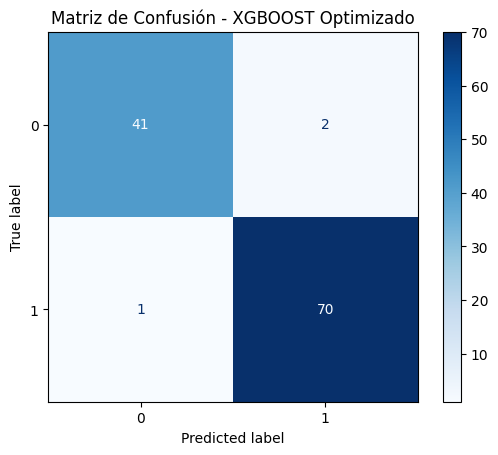

In [38]:
# Matriz de confusión -XGBOOST Optimizado
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap="Blues", normalize=None)
plt.title("Matriz de Confusión - XGBOOST Optimizado")
plt.show()

# SE OBSERVA


1. En la clasificación 0: 41 aciertos, contra 2 errores
2. En la clasificación 1: 70 aciertos , contra 1 errores



---


#Exportación Mejor Modelo POST Optimizadores

In [39]:
import joblib


path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core_xgboost/mmodel_opt_xgboost.pkl'

joblib.dump(best_model, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/core_xgboost/mmodel_opt_xgboost.pkl']